In [33]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [34]:
from math import exp
# define a gaussian kernel function
def GaussianKernel(v1, v2, sigma):
    return exp(-norm(v1-v2, 2)**2/(2.*sigma**2))

# this is a simple kernel function
def simpleKernel(n1,n2,sigma):
    difference = float(n1) - float(n2)
    difference = pow(difference,2)
    difference = (-1.0*difference)/ (sigma**2)
    return exp(difference)

In [35]:
# implement simple mean shift
import numpy as np
# random pick a point
from random import randrange

# Generate dataset
# keep the dataset the same
mu, sigma = 7.8, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
print "Actual mean is ", mu

Actual mean is  7.8


In [36]:
from scipy.spatial import distance

# this function is to calculate the k nearest neighbor
def K_Nearest_Neighbor(current, k, data):
    return_list = []
    index = 0
    distanceList = []
    for x in data:
        distanceList.append((distance.euclidean(current, x), x))
    distanceList.sort()
    #get the k nearest label
    for i in range (0, k):
        #append the first k smallest element
        return_list.append(distanceList[i][1])
    return return_list

In [37]:
threshold = 0.000001
prev = 0.0
# indicate how many neighbors to look
number_of_neighbors = 500

# random choose a point
random_index = randrange(0,len(s))
# randomly initialize the mean
estimate = s[random_index]
iteration = 0
num_of_experiment = 3 # specify run the experiment how many times

for i in range(0,num_of_experiment):
    random_index = randrange(0,len(s)) # random pick a intial at the beginning every time
    estimate = s[random_index]
    iteration = 0
    print "initial estimate mean is ", estimate
    print "num of experiment is ", i
    # experiment starts
    # while less than threshold
    while abs(estimate-prev) >= threshold:
        lst = K_Nearest_Neighbor(estimate, number_of_neighbors, s)
        iteration = iteration + 1
        numerator = 0.0
        denominator = 0.0
        for i in lst:
            # apply the kernel function
            # current is from the last iteration which get the nearest neighbor
            weight = simpleKernel(estimate,i,3.0)
            numerator = numerator + weight*i
            denominator = denominator + weight
        # update mean
        prev = estimate
        estimate = numerator/denominator
        #print "in while ", estimate
    print "number of KNN ", iteration    
    print "converged mode is ", estimate

initial estimate mean is  9.7121655802
num of experiment is  0
number of KNN  30
converged mode is  7.79519531588
initial estimate mean is  5.26530110306
num of experiment is  1
number of KNN  27
converged mode is  7.7951950359
initial estimate mean is  5.31077437904
num of experiment is  2
number of KNN  27
converged mode is  7.79519503623


In [30]:
# sequential version of mean shift
threshold = 0.000001
prev = 0.0
# one pass of the dataset
number_of_neighbors = 1
mu, sigma = 7.8, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

In [32]:
# choose the first point first
estimate = s[0]
# sList = s.tolist()
# sList.remove(estimate)
print sList

for i in range(1,len(s)):
    sample = s[i] # look at one point at a time
    print "sample is ", sample
    estimate = (estimate + sample)*1.0/2
    print "estimate is ", estimate
#     if abs(estimate - prev) < threshold:
#         break
print "final ", estimate    





[12.714542769583336, 6.13486421899329, 6.736808314049372, 16.27434621684876, 10.364323287052208, 7.342861421472314, 6.4744545130372035, 5.131644691395783, 9.414533413102951, 10.972199022730653, 5.895162080251051, 9.148910833081837, 0.6434579354653724, 8.406830947678591, 3.583249083716816, 5.892628662583679, 9.218137788997664, 1.3099692758880108, 10.243776260649891, 13.039294731343343, 4.967495733039534, 8.481147828533128, 9.932114201243827, 7.013837841237589, 6.743793489425991, 2.347672410291894, 6.823733787591872, 7.628500435356388, 9.767192047556406, 5.559327391485613, 5.142026786164388, 5.382113722650477, 3.21814990437544, 9.365900150365821, 5.130263101204836, 7.528916059400721, 8.869147823659462, 6.067547584859847, 11.366207133473429, 7.262341539805957, 6.173699154850303, 6.172659391342518, 10.58505750173491, 8.704351915916456, 9.950989002998751, 4.735095232061553, 9.266027891620302, 8.854465970783114, 4.559385160919701, 9.744389917243035, 11.695578524688289, 8.129702924064997, 4.5

ValueError: list.remove(x): x not in list

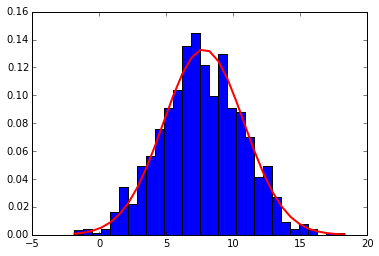

In [5]:
# graph the previous dataset
import matplotlib.pyplot as plt
s.sort()
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()